In [7]:
from ultralytics import YOLO
import cv2

model = YOLO('best.pt')

In [8]:
def detect_severity(y,w,h,Ow,Oh):
    farther_score = y/Oh
    normalised_score = (h*w)/(Ow*Oh)
    severity_score = 0.5*farther_score + 0.5*normalised_score

    if severity_score<0.15:
        return "Low"
    elif severity_score<0.3:
        return "Mid"
    else:
        return "High"


In [12]:
def draw_box(img,x,y,w,h,severity):
    cv2.rectangle(img,(x,y),(x+w,y+h),color=(0,0,0),thickness=2)
    cv2.putText(img,severity,(x,y-6),cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,0,255),thickness=2)

    return img

In [13]:
img = cv2.imread("img1.png")

for detects in model(["img1.png"])[0]:
    detect = detects.boxes.cpu().numpy()[0]
    original_h, original_w =  detect.orig_shape
    x,y = detect.xyxy[0][:2]
    w,h = detect.xywh[0][2:]
    severity = detect_severity(y,w,h,original_h,original_h)
    img = draw_box(img,int(x),int(y),int(w),int(h),severity)



0: 352x640 2 potholes, 106.5ms
Speed: 4.0ms preprocess, 106.5ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


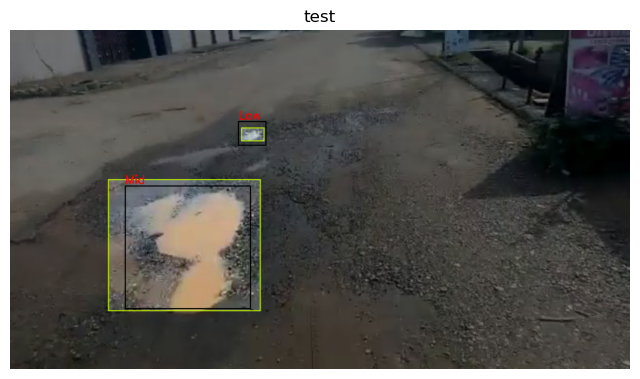

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("test")
plt.axis('off')
plt.show()